In [1]:
from pathlib import Path

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tqdm import tqdm
import soundfile

In [4]:
def read_coswara():
    
    name = []
    cough_path_list = []

    path = r"C:\Users\Admin\Desktop\DATASETS\Coswara-Data\Extracted_data\*\*\cough-shallow.wav"

    for sound_file in glob.glob(path):
        disease = "covid-19"
        name.append(disease)
        cough_path_list.append(sound_file)

    df = pd.DataFrame(cough_path_list, columns = ["cough_path"])   
    df["disease"] = name    

    df.to_csv("coswara_extracted.csv", index = False)

read_coswara()
df = pd.read_csv("coswara_extracted.csv")
coswara_meta = pd.read_csv("Coswara-Data\combined_data.csv")

In [3]:
df.head(10)

,cough_path,disease
0,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
1,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
2,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
3,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
4,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
5,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
6,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
7,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
8,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19
9,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19


In [5]:
coswara_meta.head(10)

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,yWp5tMRFDzbbeEe2csKNd909fqh1,33,no_resp_illness_exposed,2020-04-21,y,male,United States,Tucson,Arizona,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rB5oGtrGYZR5uJUXEaDYrrredz13,23,healthy,2020-04-21,y,male,France,NaN,Aisne,y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,OW5RTM4WXPawz0QLpsfjsl4FqM22,33,healthy,2020-04-20,y,male,India,Hyderabad,Telangana,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,lF4uHVWCoBPlnxvapmUJ4ROtYV73,26,healthy,2020-04-21,y,female,India,Nagpur,Maharashtra,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,LYJToDRYDZfpjBuNC6YkUcphr0q1,27,healthy,2020-04-22,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# adding patient id column to Coswara cough paths
df["patient_ID"] = None

for idx, row in df.iterrows():

    path = df["cough_path"][idx]
    id = path.split("\\")[-2] #fetching the patient id from path
    df["patient_ID"][idx] = id
    
# adding other metadata
df["gender"] = coswara_info["g"]
df["age"] = coswara_info["a"]
df["covid_status"] = coswara_info["covid_status"]
df["asthma"] = coswara_info["asthma"]
df["oth_rep"] = coswara_info["others_resp"]

In [8]:
df.head(5)

,cough_path,disease,patient_ID,gender,age,covid_status,asthma,oth_rep
0,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19,0Rlzhiz6bybk77wdLjxwy7yLDhg1,male,28,healthy,NaN,NaN
1,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19,0zexHIcM7tQDdnFiEj2Eb0v3g212,male,25,healthy,NaN,NaN
2,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19,1AuoEhB8vAfCtxTFFV0W916yBqA3,female,28,healthy,NaN,NaN
3,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19,1ctsxp37dWNbCbizTioZzpAWqJx2,male,26,healthy,NaN,NaN
4,C:\Users\Admin\Desktop\DATASETS\Coswara-Data\E...,covid-19,2TkAK2YVkYS7Ux3hAPBUgYgg9DI3,male,32,healthy,NaN,NaN


In [9]:
# replacing gender names with short notation
gender_column = df["gender"]
gender_column = gender_column.replace("male", "m")
gender_column = gender_column.replace("female", "f")
df["gender"] = gender_column
df["gender"].value_counts()

m        1668
f         703
other       2
Name: gender, dtype: int64

In [10]:
def visualize(df, title):

    gender_data = df["gender"].value_counts()

    age_distribution = df.groupby("covid_status")["age"].value_counts().rename_axis(['covid_status','age']).reset_index(name='counts')

    labels = ['Male', 'Female', "Other"]

    fig, axs = plt.subplots(1, 3, figsize=(24,6))
    fig.suptitle(title, fontsize="x-large")

    axs[0].pie(gender_data, labels = labels, autopct=lambda p : '{:.1f}%  ({:,.0f})'.format(p,p * sum(gender_data)/100), startangle = 90, colors=["steelblue", "mediumseagreen"])
    axs[0].set(title='Patient Gender')

    axs[1].barh(df["covid_status"].value_counts().index, df["covid_status"].value_counts(), color=["steelblue"])
    axs[1].set(title='COVID-19 Status')
    axs[1].bar_label(axs[1].containers[0], label_type='center', padding=2)

    # Age Distribution
    n_bins = 40
    axs[2].hist(age_distribution["age"], bins = n_bins, edgecolor='white')
    legend = ['Mean: %.2f\nStd: %.2f' % (age_distribution["age"].mean(), age_distribution["age"].std())]
    axs[2].legend(legend)
    axs[2].set(title="Age distribution of patients")

In [13]:

# There are asthma patients with COVID-19 status
asthma_patients = df["covid_status"][df["asthma"]==True].value_counts()

print("Total asthma True patients:", np.sum(asthma_patients))
print("Breakdown:")
print(asthma_patients)

Total asthma True patients: 119
Breakdown:
resp_illness_not_identified    73
healthy                        18
recovered_full                 10
positive_mild                   7
no_resp_illness_exposed         5
positive_moderate               4
positive_asymp                  2
Name: covid_status, dtype: int64


In [15]:
# Cleaning dataset from asthma patients 
df_cleaned = df[df["asthma"].isna()]

print("Total patients:", len(df_cleaned))

Total patients: 2254


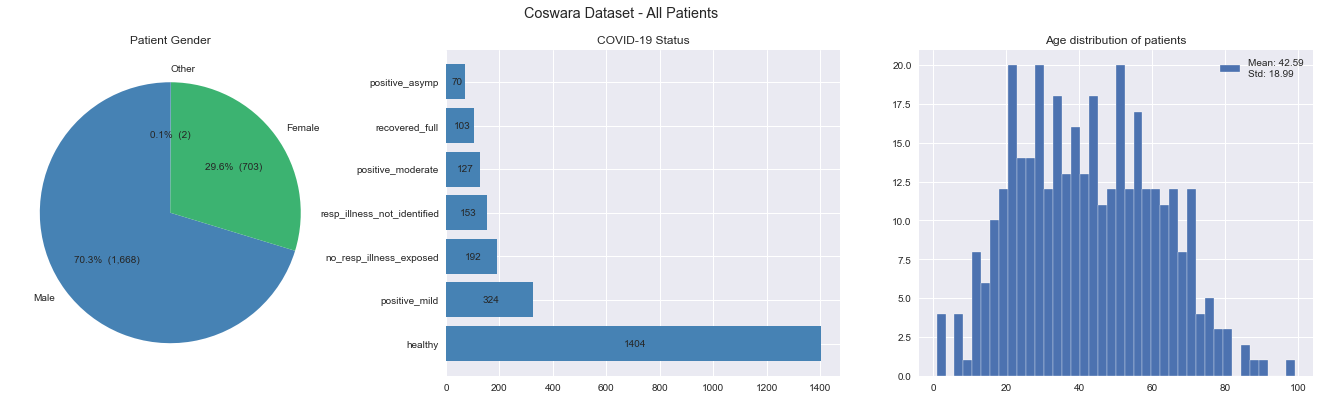

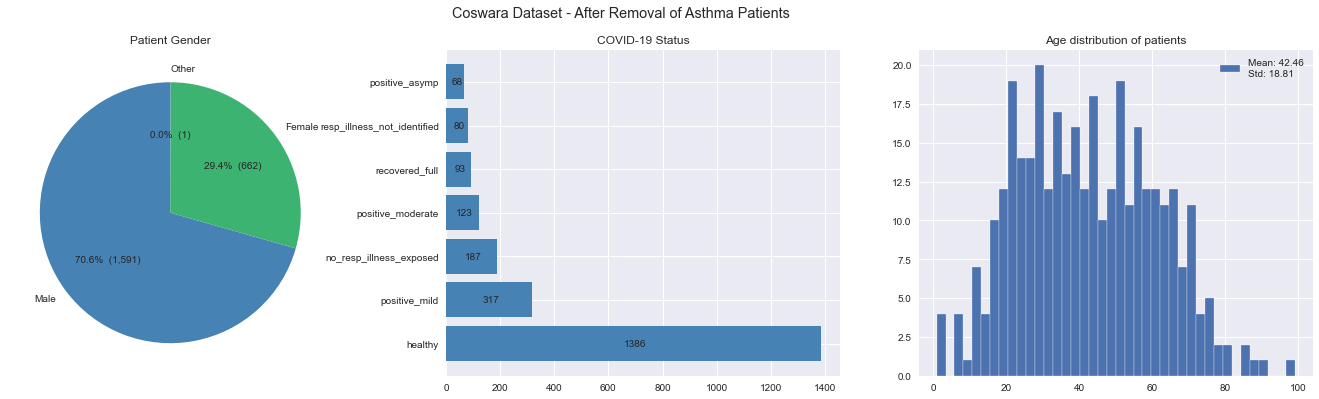

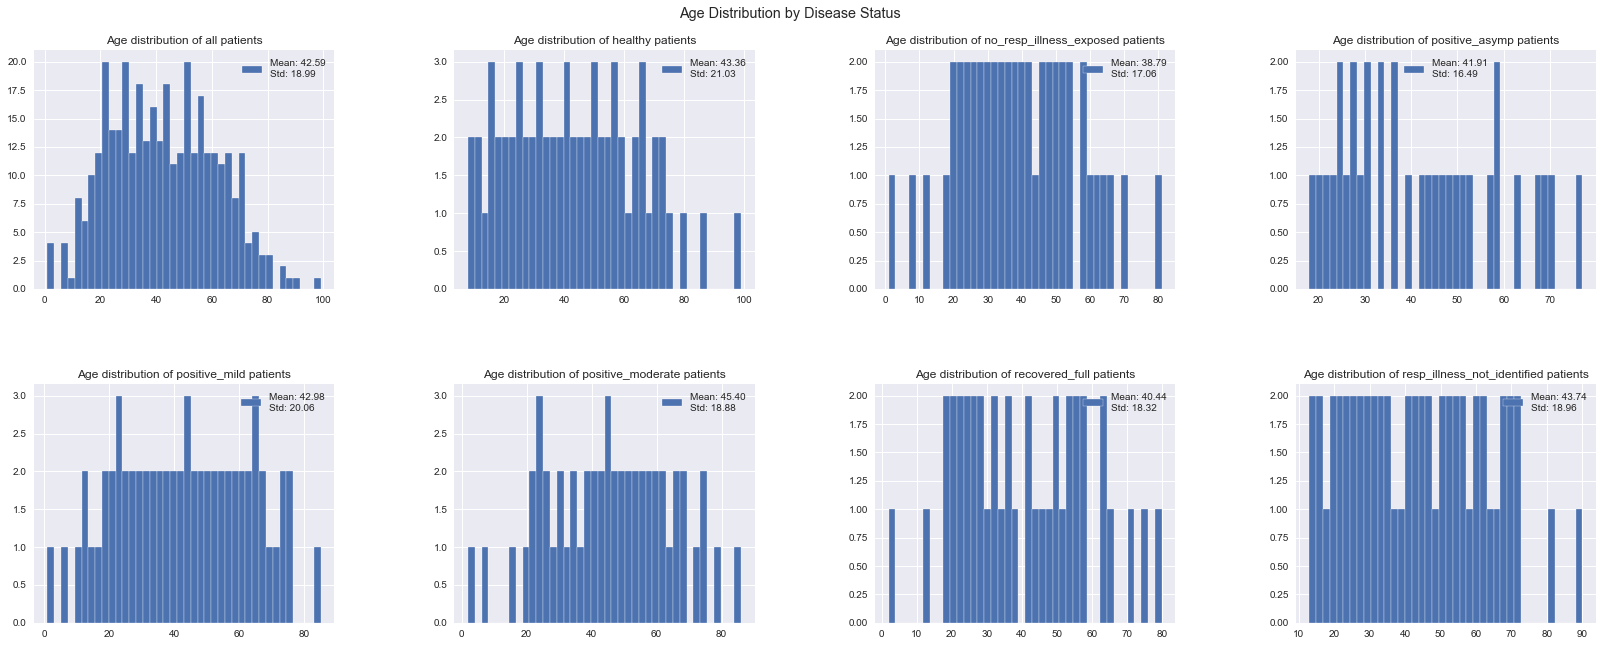

In [24]:
def plot_age_dist(df, bins=40):
    
    age_distribution = df.groupby("covid_status")["age"].value_counts().rename_axis(['covid_status','age']).reset_index(name='counts')
    health_cat = age_distribution["covid_status"].unique()

    fig, axs = plt.subplots(2, 4, figsize=(28,10))
    axs = axs.flatten()

    fig.suptitle("Age Distribution by Disease Status", fontsize="x-large")
    n_bins = bins

    axs[0].hist(age_distribution["age"], bins = n_bins, edgecolor = "white")
    legend = ['Mean: %.2f\nStd: %.2f' % (age_distribution["age"].mean(), age_distribution["age"].std())]
    axs[0].legend(legend)
    axs[0].set(title="Age distribution of all patients")    

    for i, cat in enumerate(health_cat):
        
        i+=1
        subset = age_distribution[age_distribution["covid_status"] == cat]
        axs[i].hist(subset["age"], bins = n_bins, edgecolor = "white")
        legend = ['Mean: %.2f\nStd: %.2f' % (subset["age"].mean(), subset["age"].std())]
        axs[i].legend(legend)
        axs[i].set(title="Age distribution of %s patients" % (cat))
        i+=1
    fig.subplots_adjust(top=0.92, wspace=0.4, hspace=0.4)


visualize(df, "Coswara Dataset - All Patients")
visualize(df_cleaned, "Coswara Dataset - After Removal of Asthma Patients")
plot_age_dist(df)